In [116]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [117]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

<h3 style='color:purple'>Load flowers dataset</h3>

In [118]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [119]:
data_dir

'./datasets/flower_photos'

In [120]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [121]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5223191368_01aedb6547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505682_bda885af3a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3104672186_5f75647448_n.jpg'),
 PosixPath('datasets/flower_photos/roses/229488796_21ac6ee16d_n.jpg')]

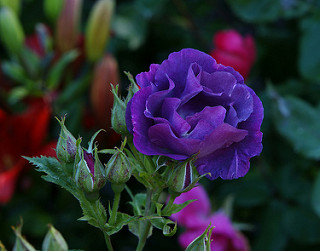

In [122]:
PIL.Image.open(str(roses[23]))

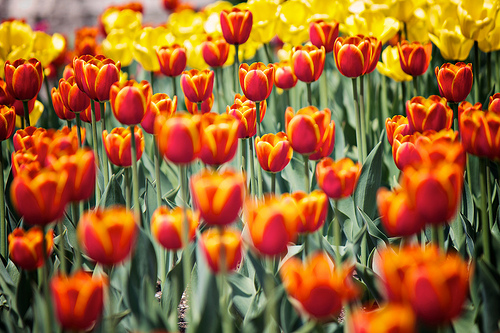

In [123]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[700]))

<h3 style='color:purple'>Convert real image into numpy array using opencv</h3>

In [124]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [125]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [126]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [127]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [129]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [130]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [131]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [132]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 71s 780ms/step - loss: 0.8393 - acc: 0.6817
Epoch 2/5
86/86 [==============================] - 67s 777ms/step - loss: 0.4332 - acc: 0.8467
Epoch 3/5
86/86 [==============================] - 67s 775ms/step - loss: 0.3323 - acc: 0.8874
Epoch 4/5
86/86 [==============================] - 67s 775ms/step - loss: 0.2771 - acc: 0.9081
Epoch 5/5
86/86 [==============================] - 67s 774ms/step - loss: 0.2397 - acc: 0.9313


In [133]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 765ms/step - loss: 0.3548 - acc: 0.8845


[0.35484233498573303, 0.8845316171646118]

<h3 style='color:purple'>Enter Value between 0 to 917 to see the results from test data</h3>

In [134]:
predicted_classes = ["ROSES", "DAISY", "DANDELION", "SUNFLOWERS", "TULIPS"]

In [135]:
def predict_image(idx):
  k = model.predict(np.array([X_test_scaled[idx]]))
  k = np.argmax(k)
  plt.imshow(X_test[idx])
  plt.xlabel(predicted_classes[k])

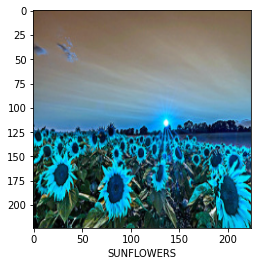

In [136]:
predict_image(917)

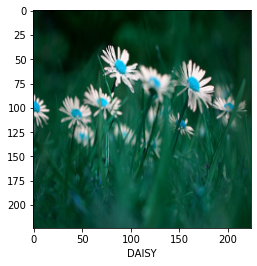

In [137]:
predict_image(34)

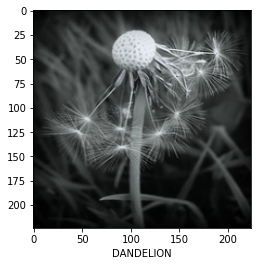

In [138]:
predict_image(234)

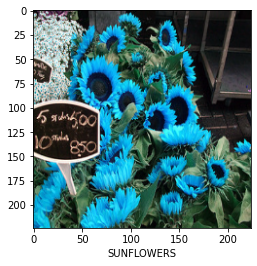

In [139]:
predict_image(778)